In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# plot

### kind : str
- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot
- 'hexbin' : hexbin plot

In [3]:
# 한글 폰트
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family =font_name)


In [4]:
mandarin=pd.read_csv("C:/Users/ICT01_10/Documents/Gina/1-project/ppt/지영 _감귤 생산량/2018 statisitic.csv", encoding='UTF-8')

print(mandarin.info())
mandarin["생산량 톤"]=mandarin["생산량 천t"]*1000 
# 1ha = 100a  # 통계값 보면 기준이 kg/10a 라서 통일
mandarin["단수 kg/10a 기준"]=mandarin["생산량 톤"]/mandarin["재배면적"] *100
result=mandarin.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
연도        34 non-null int64
재배면적      34 non-null int64
생산량 천t    34 non-null int64
 증감률      34 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB
None


In [5]:
# 생산량 = 단수 * 재배면적
mandarin

,연도,재배면적,생산량 천t,증감률,생산량 톤,단수 kg/10a 기준
0,1985,16000,394,0.000,394000,2462.500000
1,1986,16000,331,-0.155,331000,2068.750000
2,1987,17000,464,0.394,464000,2729.411765
3,1988,18000,412,-0.111,412000,2288.888889
4,1989,18727,746,0.809,746000,3983.553159
5,1990,19300,493,-0.340,493000,2554.404145
6,1991,19605,556,0.129,556000,2836.011222
7,1992,21479,718,0.292,718000,3342.799944
8,1993,21727,619,-0.139,619000,2848.989736
9,1994,21500,548,-0.113,548000,2548.837209


In [6]:
mandarin.index=mandarin['연도']
mandarin=mandarin.drop(labels='연도', axis=1)
mandarin

,재배면적,생산량 천t,증감률,생산량 톤,단수 kg/10a 기준
연도,,,,,
1985,16000,394,0.000,394000,2462.500000
1986,16000,331,-0.155,331000,2068.750000
1987,17000,464,0.394,464000,2729.411765
1988,18000,412,-0.111,412000,2288.888889
1989,18727,746,0.809,746000,3983.553159
1990,19300,493,-0.340,493000,2554.404145
1991,19605,556,0.129,556000,2836.011222
1992,21479,718,0.292,718000,3342.799944
1993,21727,619,-0.139,619000,2848.989736


Text(0.5, 0, '생산년도')

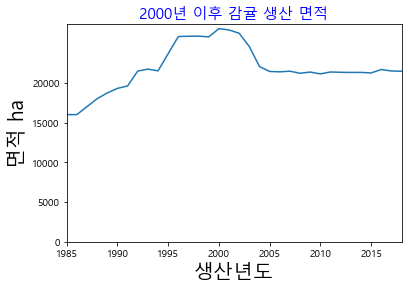

In [7]:
# 규진이가 준 상세한 재배면적으로 2000년도부터 그래프 그림
data=mandarin.iloc[:,0]
data.plot()
font1 = {'size' :15, 'color':'blue'}
plt.title(" 2000년 이후 감귤 생산 면적 ", fontdict=font1)
plt.ylabel("면적 ha", fontsize=20)
plt.yticks(ticks=[0,5000,10000,15000,20000]) 
plt.xlabel("생산년도", fontsize=20)
#2002년-2004년 재배면적이 줄어들었음

In [8]:
mandarin=pd.read_csv("C:/Users/ICT01_10/Documents/Gina/1-project/ppt/지영 _감귤 생산량/2018 statisitic.csv", 
                        encoding='UTF-8')
mandarin["생산량 t"]=mandarin.iloc[:,2]*1000
mandarin

,연도,재배면적,생산량 천t,증감률,생산량 t
0,1985,16000,394,0.000,394000
1,1986,16000,331,-0.155,331000
2,1987,17000,464,0.394,464000
3,1988,18000,412,-0.111,412000
4,1989,18727,746,0.809,746000
5,1990,19300,493,-0.340,493000
6,1991,19605,556,0.129,556000
7,1992,21479,718,0.292,718000
8,1993,21727,619,-0.139,619000
9,1994,21500,548,-0.113,548000


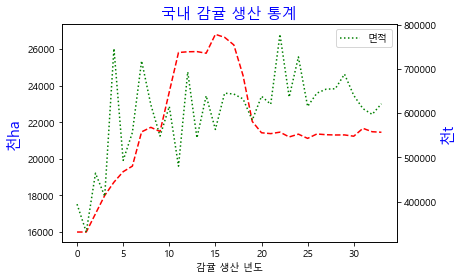

In [9]:
# 한개의 그래프에 y축을 두개 그리기

fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
font1 = {'size' :15, 'color':'blue'}
font2 = {'size' :15, 'color':'blue'}
ax0.set_title("국내 감귤 생산 통계",fontdict=font1)
#

ax0.plot(mandarin.iloc[:,1], 'r--')
ax0.set_ylabel("천ha",fontdict=font2)
ax0.grid(False)

ax1.plot(mandarin.iloc[:,4], 'g:')
ax1.set_ylabel("천t",fontdict=font2)
ax1.grid(False)

ax0.set_xlabel("감귤 생산 년도")
plt.legend(['면적'])

# 재배면적이 많아도 생산량이 높지않음, 그이유는 ?
# 뉴스내용 참고

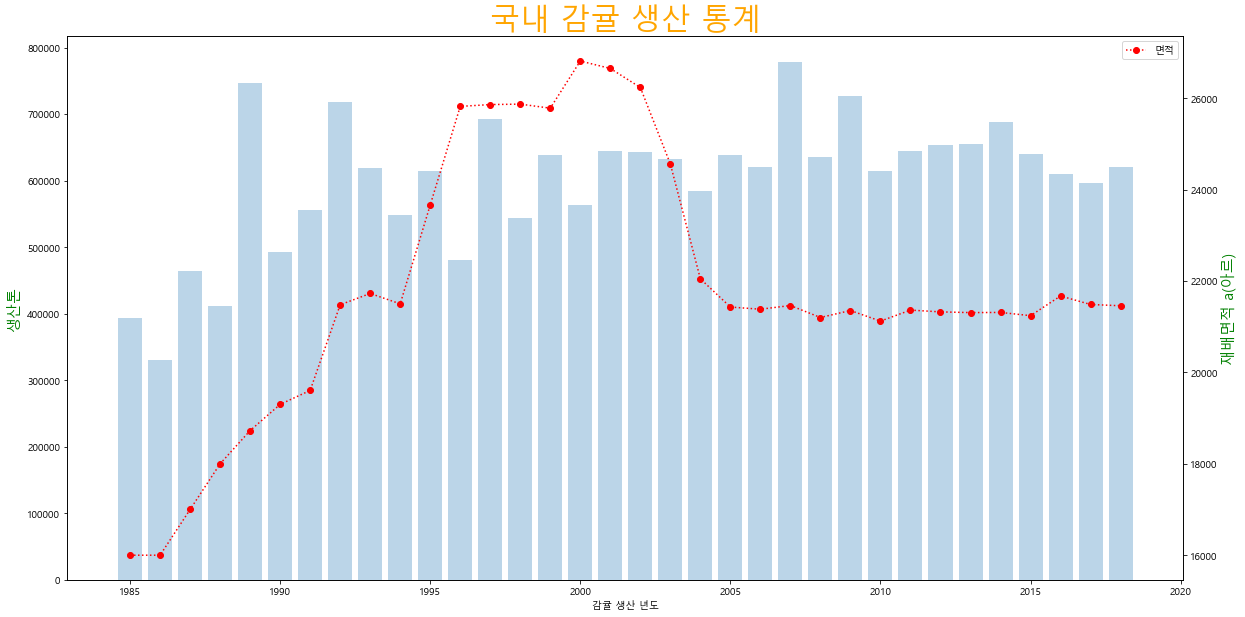

In [25]:
# 각각의 이산형으로 바꾸기 = 막대그래프로 그리려면 연속형이 아니라서 이산형이어야함!!
# http://hleecaster.com/python-matplotlib-bar-graph/

X=mandarin.iloc[:,0]
product=mandarin.iloc[:,4]
area=mandarin.iloc[:,1]


fig, ax0 =plt.subplots(figsize=(20,10))
ax1 = ax0.twinx()
font1 = {'size' :30, 'color':'Orange'}
font2 = {'size' :15, 'color':'green'}
ax0.set_title("국내 감귤 생산 통계",fontdict=font1)
ax0.bar(X, product, alpha=.3)
ax0.set_ylabel("생산톤",fontdict=font2)
ax0.grid(False)

ax1.plot(X,area,'ro:')
ax1.set_ylabel("재배면적 a(아르)",fontdict=font2)
ax1.grid(False)


ax0.set_xlabel("감귤 생산 년도")
plt.legend(['면적'])

http://www.ikpnews.net/news/articleView.html?idxno=24084
    
    드높은 감귤의 위상, 그 하락의 시작

본격적인 개방농정이 시작되면서 감귤의 과잉생산이 문제되기 시작했다. 
결국 전체 감귤 생산액은 2002년도에 들어서면서부터 큰 폭으로 하락했다.

1996년 6,079억원이었던 생산액은 2002년 3,164억원까지 곤두박질 쳤다. 
그리고 다시 소폭 증가한 이후 더 이상의 상승세는 없었다.

한국농촌경제연구원에 따르면 감귤 재배면적은 폐원지원사업과 도시개발 등으로 인해
2000년 2만7,000ha에서 2010년 2만1,000ha로 연평균 2%씩 감소했다. 
이후 정체상태를 유지하며 2014년 현재 재배면적은 2만1,334ha를 유지하고 있다.

- 이처럼 재배면적 감소에도 불구하고 생산량 감소는 눈에 띄는 수준은 아니었다. 
- 과거에는 노지감귤의 해거리 현상으로 인해 연간 생산량 변동이 심했으나, 
- 품종과 작형이 다양화되고 
- 지역별 해거리 편차 발생 등 생산 안정을 위한 정책 시행으로 인해 생산량은 안정됐기 때문이다. 

- 2010년까지 생산량 감소는 없었다. 
- 그리고 2011년 이후부터 68만톤 내외의 생산량을 꾸준히 유지했다.

출처 : 한국농정신문(http://www.ikpnews.net)

In [154]:
경기침체도 문제지만
가장 큰 원인으로는 FTA에 따른 시장개방 및 감귤 비상품과 유통 등이 지적되고 있다.
특히 품질이 균일치 않고 
생과위주의 소비, 내수·수출용의 혼합 재배, 
수많은 생산·유통조직이 감귤산업 저해의 원인으로 손꼽힌다.

갑작스레 밀려드는 수입과일에 대응키엔, 
아직 제주도의 감귤산업은 아무 준비가 돼 있지 않았던 셈이다.

농경연 조사결과에 의하면 감귤 1인당 연간 소비량은
2007년 16kg을 정점으로 계속 감소 추세를 보인다. 
2011년부터는 안정적인 생산량을 바탕으로 14kg 수준을 유지하고 있지만, 
총 공급량 감소에 따라 올해(2015년) 13.4kg에서 
2024년에는 12.8kg으로까지 줄어들 것으로 전망하고 있다.

- 지금과 동일하게 유통비 50% 차지
용선료, 하역비 추가부담, 
생산자재는 육지부에서 반입을 하다 보니 
제주도에서는 과일류의 경우 유통비용률이 50%에 달한다. 
감귤 최종가격에서 농가 수취가격을 제외한 가격이 50%나 차지한다는 뜻이다.


출처 : 한국농정신문(http://www.ikpnews.net) 2015년 뉴스기사

SyntaxError: invalid syntax (<ipython-input-154-65ba48cf6927>, line 1)

In [504]:
# 10년간 감귤 생산량에 대한 통계 - 전국과 제주도내 생산비교

In [29]:
mandarin =pd.read_csv("C:/Users/ICT01_10/Documents/Gina/1-project/ppt/지영 _감귤 생산량/cle_10.csv", 
                        encoding='UTF-8')

mandarin.index=mandarin['연도']
# drop axis의 경우 column이면 1, row이면 0이다.

mandarin.drop(labels='연도', axis=1, inplace=True) 
mandarin_Y=mandarin.iloc[:,1:]

[]

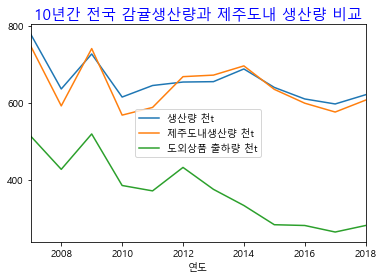

In [34]:
mandarin_Y.plot()
font1 = {'size' :15, 'color':'blue'}
plt.title(" 10년간 전국 감귤생산량과 제주도내 생산량 비교 ", fontdict=font1)
plt.yticks(ticks=[0,200,400,600,800,1000]) 
plt.plot(figsize=(20,10))
# 10년동안 큰 변화가 없어보인다. 제주도내 생산량이 전국생산량을 대표한다

In [27]:
mandarin=pd.read_excel("C:/Users/ICT01_10/Documents/Gina/1-project/ppt/지영 _감귤 생산량/엑셀자료정리/2018년 감귤류3종,도외,도내비교.xlsx")
mandarin=mandarin.iloc[:,:11]
mandarin.index=mandarin["연도"]
jeju=mandarin.drop('연도', axis=1)
jeju

,제주도 내 생산량 천t,노지온주 출하량 천t,노지 도외상품 출하량,노지 도내소비(택배포함),하우스온주 출하량 천t,하우스온주 도외 출하량,하우스온주 도내소비(택배포함),월동온주 출하량 천t,월동온주 도외 출하량,월동온주 도내소비(택배포함)
연도,,,,,,,,,,
2013,672,554,375,82,19.6,16.4,3.1,35,15.5,19.2
2014,696,573,333,78,21.6,19.2,2.3,36,16.6,19.2
2015,635,519,283,147,20.4,18.2,2.1,28,9.7,18.2
2016,599,467,281,124,21.7,19.5,2.1,37,15.8,21.4
2017,576,440,264,99,22.6,20.5,2.1,35,11.0,23.8
2018,607,467,281,120,22.9,20.0,2.9,37,15.4,21.5


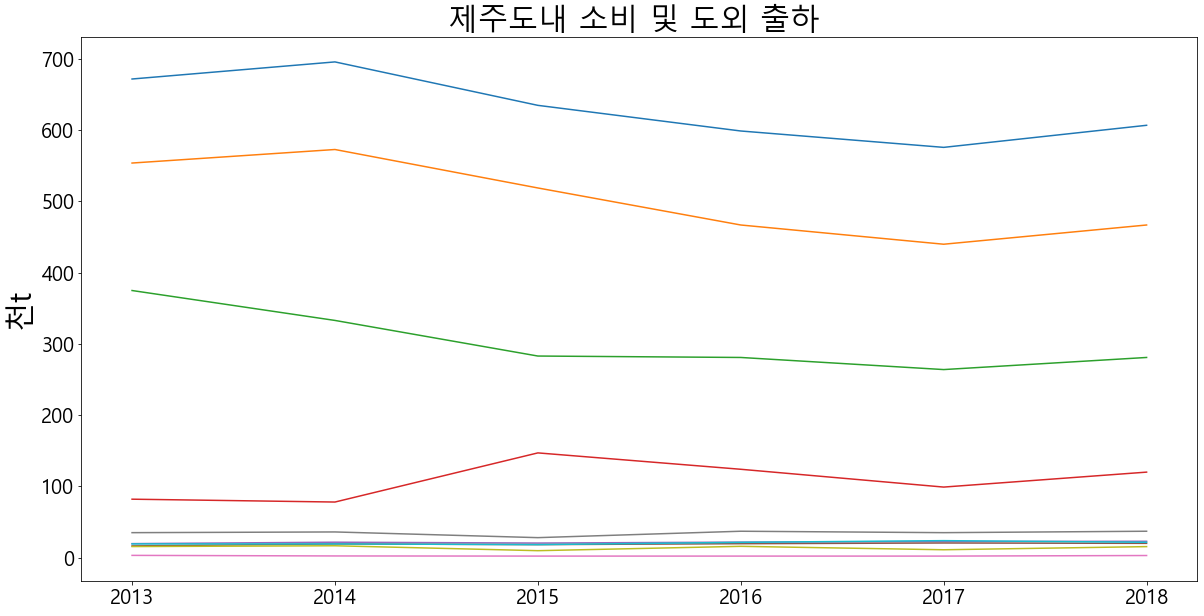

In [28]:
f1= plt.figure(figsize=(20,10))
plt.title("제주도내 소비 및 도외 출하 ", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("천t", fontsize=30)
plt.plot(jeju)
plt.show()


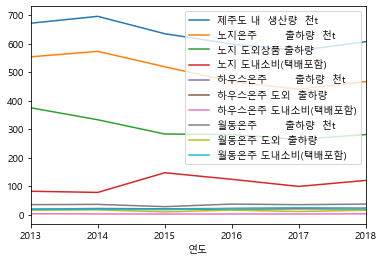

In [29]:
jeju.plot()


In [428]:
weather_jeju =pd.read_csv('C:/workR/1-project/ppt/기후/jeju.csv', encoding='CP949')
weather_jeju=weather_jeju.iloc[:468,:]
weather_jeju

,일시,평균기온,최고기온 평균,최저기온 평균,강수량mm
0,1980-01,6.0,9.1,3.0,143.3
1,1980-02,4.4,7.7,1.2,61.4
2,1980-03,8.9,12.3,5.2,154.3
3,1980-04,13.3,17.0,9.0,179.9
4,1980-05,17.2,21.2,12.9,310.1
...,...,...,...,...,...
463,2018-08,28.0,31.1,25.7,376.5
464,2018-09,23.5,26.5,21.0,521.8
465,2018-10,17.5,20.8,14.4,347.0
466,2018-11,13.9,17.4,10.6,55.6


In [429]:
weather_jeju['일시']=pd.to_datetime(weather_jeju['일시'])

In [430]:
weather_jeju

,일시,평균기온,최고기온 평균,최저기온 평균,강수량mm
0,1980-01-01,6.0,9.1,3.0,143.3
1,1980-02-01,4.4,7.7,1.2,61.4
2,1980-03-01,8.9,12.3,5.2,154.3
3,1980-04-01,13.3,17.0,9.0,179.9
4,1980-05-01,17.2,21.2,12.9,310.1
...,...,...,...,...,...
463,2018-08-01,28.0,31.1,25.7,376.5
464,2018-09-01,23.5,26.5,21.0,521.8
465,2018-10-01,17.5,20.8,14.4,347.0
466,2018-11-01,13.9,17.4,10.6,55.6


In [434]:
weather_jeju.index=weather_jeju['일시']
weather_jeju

,일시,평균기온,최고기온 평균,최저기온 평균,강수량mm
일시,,,,,
1980-01-01,1980-01-01,6.0,9.1,3.0,143.3
1980-02-01,1980-02-01,4.4,7.7,1.2,61.4
1980-03-01,1980-03-01,8.9,12.3,5.2,154.3
1980-04-01,1980-04-01,13.3,17.0,9.0,179.9
1980-05-01,1980-05-01,17.2,21.2,12.9,310.1
...,...,...,...,...,...
2018-08-01,2018-08-01,28.0,31.1,25.7,376.5
2018-09-01,2018-09-01,23.5,26.5,21.0,521.8
2018-10-01,2018-10-01,17.5,20.8,14.4,347.0


In [438]:
weather_jeju.drop(labels=['일시'], axis=1, inplace=True)

In [441]:
temp_jeju=weather_jeju.iloc[:,:3] # 그래프 그리니 이상해서 강수량 제거

temp_jeju.info()
temp_jeju

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 468 entries, 1980-01-01 to 2018-12-01
Data columns (total 3 columns):
평균기온       468 non-null float64
최고기온 평균    468 non-null float64
최저기온 평균    468 non-null float64
dtypes: float64(3)
memory usage: 14.6 KB


,평균기온,최고기온 평균,최저기온 평균
일시,,,
1980-01-01,6.0,9.1,3.0
1980-02-01,4.4,7.7,1.2
1980-03-01,8.9,12.3,5.2
1980-04-01,13.3,17.0,9.0
1980-05-01,17.2,21.2,12.9
...,...,...,...
2018-08-01,28.0,31.1,25.7
2018-09-01,23.5,26.5,21.0
2018-10-01,17.5,20.8,14.4


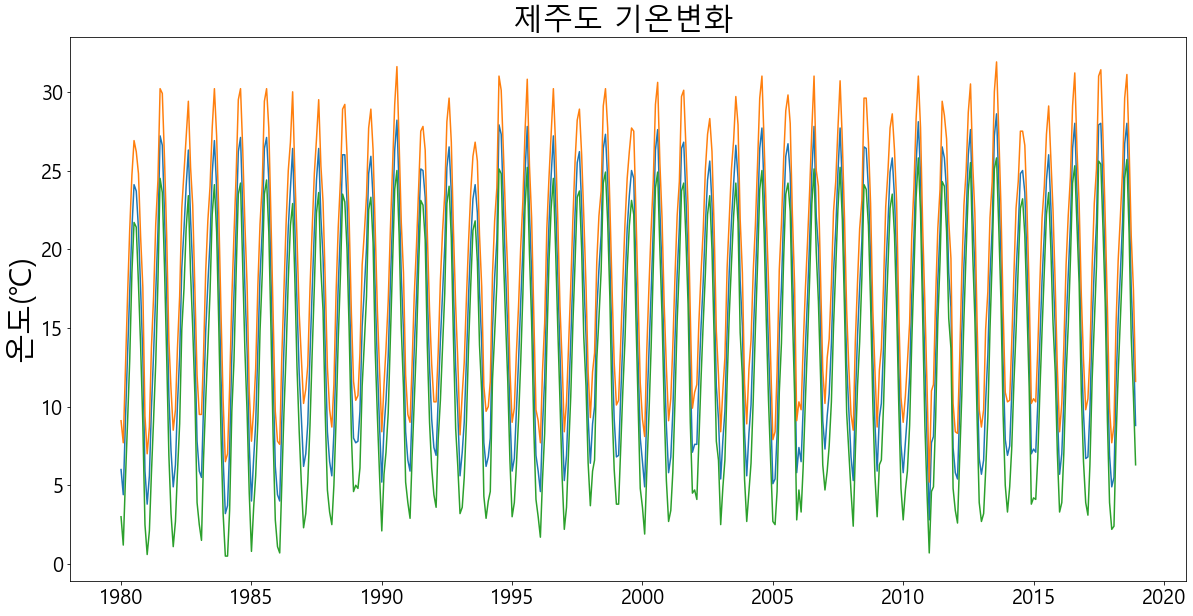

In [442]:
f2= plt.figure(figsize=(20,10))
plt.title("제주도 기온변화 ", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("온도(℃)", fontsize=30)
plt.plot(temp_jeju)


In [ ]:
# 2007년 부터 감귤 월별 도외출하량 

In [67]:
monthly=pd.read_excel("C:/workR/1-project/ppt/지영 _감귤 생산량/2007_2020.xlsx")
monthly

,2007.04,2007.05,2007.06,2007.07,2007.08,2007.09,2007.10,2007.11,2007.12,2008.01,...,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,2019.10,2019.11,2019.12,2020.01
0,14.35,767.44,2805.87,3412.38,3018.01,5893.68,41850.05,97530.66,131097.05,139389.05,...,28.07,1019.26,2422.37,2689.74,4460.62,8588.62,38025.48,58061.22,74342.07,53227.04


In [68]:
monthly=monthly.T


# 행과 열 바꿔주고 object 인 문자열 숫자로 바꾸기
# https://ledgku.tistory.com/45
#https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603778414&proxyReferer=https%3A%2F%2Fwww.google.com%2F
#monthly['date']=monthly['date'].str.replace(pat='.', repl='-', regex=False)


In [69]:
monthly["date"]=monthly.index
monthly.columns=["월별생산량","월"]
monthly

,월별생산량,월
2007.04,14.35,2007.04
2007.05,767.44,2007.05
2007.06,2805.87,2007.06
2007.07,3412.38,2007.07
2007.08,3018.01,2007.08
...,...,...
2019.09,8588.62,2019.09
2019.10,38025.48,2019.10
2019.11,58061.22,2019.11
2019.12,74342.07,2019.12


In [16]:
# 데이터프레임 합치기 #일단 데이터 정리하고 위 생산면적에 Merging 후에 나누기 산술연산 해서 새로운컬럼 생산
clementine =pd.read_csv("C:/workR/1-project/ppt/지영 _감귤 생산량/2018 statisitic.csv", 
                        encoding='UTF-8')
cle_proc=clementine.iloc[6:,]
cle_proc=pd.DataFrame(cle_proc)

jeju_area=pd.read_csv("C:/workR/1-project/ppt/지영 _감귤 생산량/product_area.csv", encoding='CP949')
area=jeju_area.iloc[17,8:27] #한행만 뽑아내서 series 됨
area=pd.DataFrame(area)
area=area.rename({17:"재배면적"},axis='columns')

#area.info() # 문자열이라서 치환해줄것


area["재배면적"]=pd.to_numeric(area["재배면적"])
print(area.info())
area

area["연도"]=area.index
print(area.info()), print()
# 또 문자열 => 숫자형으로 치환

area["연도"]=pd.to_numeric(area["연도"])
print(area.info())
area





# 공통인덱스로 합치려고 했으나 실패함
data=pd.concat([cle_proc, area], ignore_index=False, axis=1)
data


# MERGE 이용

#Merging   https://nittaku.tistory.com/121
result=pd.merge(cle_proc, area)
result["생산량 톤"]=result["생산량 천t"]*1000 
# 1ha = 100a  # 통계값 보면 기준이 kg/10a 라서 통일
result["단수 kg/10a 기준"]=result["생산량 천t"]*1000 /result["재배면적"] *100
result_count=result.copy()
#result_count

result_count.index=result_count["연도"]
result_count=result_count.iloc[:,3:]
result_count # 단수 자료는 따로 인스턴스 저장


result # 원본데이터 보관

,연도,"면적 단위 천ha,",생산량 천t,재배면적,생산량 톤,단수 kg/10a 기준
0,2000,27,563,26813,563000,2099.727744
1,2001,27,645,26650,645000,2420.262664
2,2002,26,643,26234,643000,2451.017763
3,2003,25,632,24560,632000,2573.289902
4,2004,22,584,22048,584000,2648.766328
5,2005,22,638,21430,638000,2977.134858
6,2006,21,620,21382,620000,2899.635207
7,2007,21,778,21463,778000,3624.842753
8,2008,21,636,21201,636000,2999.858497
9,2009,21,727,21354,727000,3404.514377


In [ ]:
# 시계열 데이터 분석을 위해서
#  reindex 날짜 추가해보자
date_add=pd.date_range("1969", periods=100, freq="Y")
clementine.reindex(date_add)
